In [1]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [2]:
sbin=pd.read_csv('GOOGLE.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head())
print(sbin.info())
print(sbin.describe())


        Date   Close    Open    High     Low    Vol. Change %  Unnamed: 7  \
0  6/28/2024  182.15  184.32  185.13  181.96  29.16M   -1.76%         NaN   
1  6/27/2024  185.41  184.18  186.05  184.02  18.85M    0.83%         NaN   
2  6/26/2024  183.88  182.63  184.51  182.48  19.84M   -0.08%         NaN   
3  6/25/2024  184.03  179.62  184.29  179.42  23.24M    2.68%         NaN   
4  6/24/2024  179.22  180.16  180.89  178.67  18.30M   -0.23%         NaN   

   Price  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4999 non-null   object 
 1   Close       4999 non-null   float64
 2   Open        4999 non-null   float64
 3   High        4999 non-null   float64
 4   Low         4999 non-null   float64
 5   Vol.        4999 non-null   object 
 6   Change %    4999 non-null   obje

In [3]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4999 non-null   datetime64[ns]
 1   Close       4999 non-null   float64       
 2   Open        4999 non-null   float64       
 3   High        4999 non-null   float64       
 4   Low         4999 non-null   float64       
 5   Vol.        4999 non-null   object        
 6   Change %    4999 non-null   object        
 7   Unnamed: 7  0 non-null      float64       
 8   Price       0 non-null      float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 351.6+ KB
None


In [4]:
print(sbin['Close'].mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       182.15
1       185.41
2       183.88
3       184.03
4       179.22
         ...  
4994      2.70
4995      2.65
4996      2.62
4997      2.74
4998      2.71
Name: Close, Length: 4999, dtype: float64>


Int64Index([2098], dtype='int64')
[36.05]
[35.86]
[36.24]
[724.62]


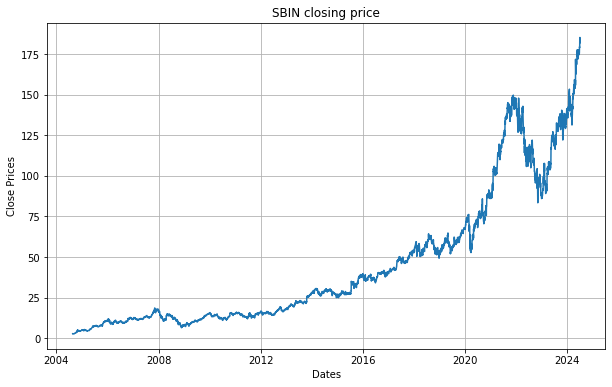

In [5]:
# Plotting Time data
idx= sbin['Close'] >= 500

index=sbin.index[idx]
print(index)
avg=(sbin.Close[index-1].values+sbin.Close[index+1].values)/2
print(avg)
print(sbin.Close[index-1].values)
print(sbin.Close[index+1].values)
print(sbin.Close[index].values)
sbin.Close[index]=avg
#sbin.Open[index]=avg
#sbin.High[index]=avg

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [6]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date  Close  Open  High   Low     Vol. Change %  Unnamed: 7  Price
4998 2004-08-20   2.71  2.54  2.73  2.51  228.59M    7.97%         NaN    NaN
4997 2004-08-23   2.74  2.77  2.84  2.73  182.80M    1.11%         NaN    NaN
4996 2004-08-24   2.62  2.78  2.79  2.59  152.64M   -4.38%         NaN    NaN
4995 2004-08-25   2.65  2.63  2.70  2.60   91.98M    1.15%         NaN    NaN
4994 2004-08-26   2.70  2.63  2.70  2.62   71.02M    1.89%         NaN    NaN
(4999, 9)
        Date Close  Open  High   Low     Vol. Change % Unnamed: 7 Price
0 2004-08-20  2.71  2.54  2.73  2.51  228.59M    7.97%        NaN   NaN
1 2004-08-23  2.74  2.77  2.84  2.73  182.80M    1.11%        NaN   NaN
2 2004-08-24  2.62  2.78  2.79  2.59  152.64M   -4.38%        NaN   NaN
3 2004-08-25  2.65  2.63   2.7   2.6   91.98M    1.15%        NaN   NaN
4 2004-08-26   2.7  2.63   2.7  2.62   71.02M    1.89%        NaN   NaN


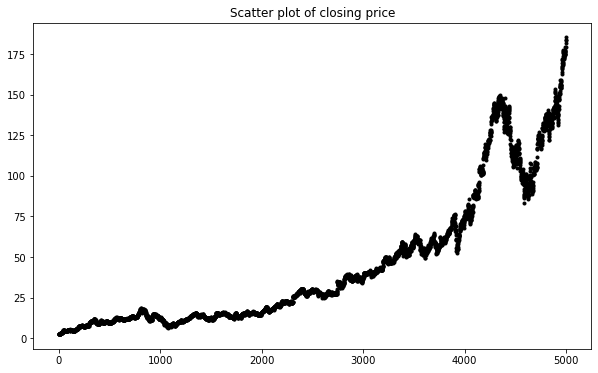

In [7]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(10,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [8]:
print(df1.describe())

             Close         Open         High          Low  Unnamed: 7  Price
count  4999.000000  4999.000000  4999.000000  4999.000000         0.0    0.0
mean     44.753559    44.873441    45.342811    44.413561         NaN    NaN
std      42.161943    43.206658    43.661953    42.791456         NaN    NaN
min       2.500000     2.480000     2.550000     2.480000         NaN    NaN
25%      13.070000    13.060000    13.200000    12.920000         NaN    NaN
50%      27.480000    27.520000    27.740000    27.270000         NaN    NaN
75%      60.315000    60.175000    60.700000    59.715000         NaN    NaN
max     185.410000   724.440000   724.620000   724.440000         NaN    NaN


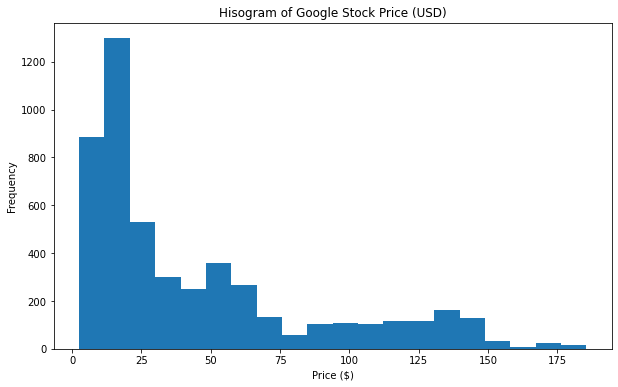

In [9]:
# Histogram of Closing Price of BitCoin

plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist',bins=20)
plt.title('Hisogram of Google Stock Price (USD)')
plt.xlabel('Price ($)')
plt.show()

Neural Network

In [10]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

#plt.style.use('fivethirtyeight')

In [11]:
# Selecting data points as the paper

idxs=df2.index[df2['Date']=='2013-01-02'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2017-12-29'].values
#print('ddd',idxn)

print(idxs,idxn)
dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


[2106] [3365]


In [12]:
print(data.describe())
print(data.info())


print('mean =',data.Close.mean())

print('min =',data.Close.min())
print('max =',data.Close.max())
print('std =',data.Close.std())
print('skew =',data.Close.skew())
print('kurt =',data.Close.kurt())

from statsmodels.tsa.stattools import adfuller, kpss

print('Adf test :Ho: Non-Stationary, H1: Stationary \n',adfuller(dataset))
#H0: Non-Stationary
#H1: stationary
print('KPSS test : Ho: Stationary, H1: Not Stationary   \n',kpss(dataset))
#H0: Stationary
#H1: Non-stationary
from scipy.stats import norm, kurtosis, skew, shapiro, normaltest

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print('Shapiro Test: Ho: Data frm Normal Dist \n', shapiro(dataset))
#print(normaltest(dataset))

#H0: data from normal distribution
#H1: data not from normal distribution    

print('kurtosis: ',kurtosis(dataset))
#print(skew(dataT))

          Close
count   1259.00
unique   942.00
top       22.22
freq       5.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 2106 to 3364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1259 non-null   object
dtypes: object(1)
memory usage: 10.0+ KB
None
mean = 33.31220015885622
min = 17.59
max = 54.25
std = 9.029688940232706
skew = 0.38739583034535313
kurt = -0.7986407726165017
Adf test :Ho: Non-Stationary, H1: Stationary 
 (-0.4128127032732555, 0.9079374347816496, 1, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 1517.7318125653824)
KPSS test : Ho: Stationary, H1: Not Stationary   
 (5.340780211221826, 0.01, 21, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Shapiro Test: Ho: Data frm Normal Dist 
 ShapiroResult(statistic=0.9554046392440796, pvalue=3.847934866659463e-19)
kurtosis:  [-0.8002344756610094]


<ipython-input-12-aacbb9be3054>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS test : Ho: Stationary, H1: Not Stationary   \n',kpss(dataset))


In [13]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [14]:
# Create the training dataset


#training_data_len=math.ceil(len(dataset)* 0.8)
training_data_len=math.ceil(len(dataset)* 0.8)

print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

1008


In [15]:
print(data.head())
print(data.info())
print(data.describe())

      Close
2106   18.1
2107  18.11
2108  18.47
2109  18.39
2110  18.35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 2106 to 3364
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1259 non-null   object
dtypes: object(1)
memory usage: 10.0+ KB
None
          Close
count   1259.00
unique   942.00
top       22.22
freq       5.00


In [16]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(948, 60)
(251, 60)


In [17]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(948, 60, 1)
(251, 60, 1)


In [160]:
print(y_test.shape)
print(y_train.shape)
yy_test=y_test[:,-1]
#yy_test=yy_test[]
print(yy_test.shape)
print (y_test)
print(yy_test)

(251, 1)
(948,)
(251,)
[[39.62]
 [40.4]
 [40.39]
 [40.65]
 [41.26]
 [41.36]
 [41.3]
 [41.49]
 [41.48]
 [41.55]
 [41.37]
 [41.45]
 [41.22]
 [41.41]
 [42.22]
 [42.48]
 [42.92]
 [42.85]
 [42.25]
 [41.19]
 [41.01]
 [40.76]
 [40.91]
 [41.01]
 [41.08]
 [41.46]
 [41.49]
 [41.5]
 [41.74]
 [41.95]
 [42.0]
 [41.87]
 [42.11]
 [42.33]
 [42.46]
 [42.57]
 [42.55]
 [42.39]
 [42.48]
 [42.25]
 [42.84]
 [42.49]
 [42.45]
 [42.36]
 [42.56]
 [42.68]
 [42.89]
 [43.07]
 [43.23]
 [43.3]
 [43.42]
 [43.5]
 [43.62]
 [43.4]
 [42.51]
 [42.49]
 [41.98]
 [41.76]
 [41.93]
 [42.03]
 [42.49]
 [42.47]
 [42.39]
 [42.84]
 [42.63]
 [42.45]
 [42.25]
 [42.1]
 [42.09]
 [41.99]
 [42.07]
 [42.01]
 [42.76]
 [42.7]
 [42.83]
 [43.0]
 [42.95]
 [43.95]
 [44.44]
 [44.46]
 [44.57]
 [46.23]
 [46.64]
 [46.85]
 [47.42]
 [47.74]
 [47.51]
 [47.93]
 [47.84]
 [47.74]
 [47.79]
 [47.76]
 [47.96]
 [48.23]
 [47.11]
 [47.52]
 [47.73]
 [48.2]
 [48.53]
 [48.88]
 [49.59]
 [49.66]
 [49.81]
 [49.35]
 [49.41]
 [49.81]
 [50.19]
 [49.83]
 [50.08]
 [50.21

# Model Create and train 

In [18]:
!pip install pykan

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Transformer Block in PyTorch
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.15):
        super(TransformerEncoderLayer, self).__init__()
        self.layer_norm1 = nn.LayerNorm(embed_dim)
        self.layer_norm2 = nn.LayerNorm(embed_dim)
        self.multihead_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, embed_dim),
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Attention block
        x_res = self.layer_norm1(x)
        attn_output, _ = self.multihead_attn(x_res, x_res, x_res)
        x = attn_output + x

        # Feedforward block
        x_res = self.layer_norm2(x)
        x_res = self.ffn(x_res)
        x = x + x_res
        return x

# LSTM-Attention-Dense Model Definition in PyTorch
class LSTMAttentionDenseModel(nn.Module):
    def __init__(self, input_dim, hidden_dim_lstm, ff_dim, num_heads, dropout=0.1):
        super(LSTMAttentionDenseModel, self).__init__()

        # LSTM layers
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_lstm, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim_lstm, 60, batch_first=True)

        # Reshape equivalent
        self.reshape = nn.Linear(60,1)

        # Transformer layer
        self.transformer = TransformerEncoderLayer(embed_dim=60, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)
        

        # Pooling and final dense layers
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # LSTM processing
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)

        # Reshape
        x = x[:, -1, :]  # Take the last time step output from LSTM
        x = x.unsqueeze(2)  # Add a dimension to match transformer input
        x = self.reshape(x)

        # Transformer
        x = self.transformer(x)

        # Pooling
        x = x.squeeze(2)  # Remove the last dimension for pooling
        x = self.global_avg_pool(x.unsqueeze(1)).squeeze(1)

        # Fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize the model
input_dim = x_train.shape[1]  # Adjust as per the input shape
model = LSTMAttentionDenseModel(input_dim=input_dim, hidden_dim_lstm=60, ff_dim=2, num_heads=2)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Model Summary (Equivalent to TensorFlow's model.summary())
print(model)

# Training the model
num_epochs = 12
batch_size = 1
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(x_train), batch_size):
        inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


LSTMAttentionDenseModel(
  (lstm1): LSTM(60, 60, batch_first=True)
  (lstm2): LSTM(60, 60, batch_first=True)
  (transformer): TransformerEncoderLayer(
    (layer_norm1): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
    (layer_norm2): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
    (multihead_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=60, out_features=60, bias=True)
    )
    (ffn): Sequential(
      (0): Linear(in_features=60, out_features=2, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.1, inplace=False)
      (3): Linear(in_features=2, out_features=60, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=60, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


RuntimeError: Expected 2 to 3 dimensions, but got 4-dimensional tensor for argument #1 'self' (while checking arguments for adaptive_avg_pool1d)

In [135]:
## Okay

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# LSTM-Attention-Dense Model Definition in PyTorch
class LSTMAttentionDenseModel(nn.Module):
    def __init__(self, input_dim, hidden_dim_lstm, ff_dim, num_heads, dropout=0.1):
        super(LSTMAttentionDenseModel, self).__init__()

        # LSTM layers
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_lstm, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim_lstm, 60, batch_first=True)

        # Layer normalization
        self.layer_norm1 = nn.LayerNorm(60)
        self.layer_norm2 = nn.LayerNorm(60)

        # Multi-head attention
        self.multihead_attn = nn.MultiheadAttention(embed_dim=60, num_heads=num_heads, dropout=dropout)

        # Feed-forward network (FFN)
        self.fc_ffn1 = nn.Linear(60, ff_dim)
        self.fc_ffn2 = nn.Linear(ff_dim, 60)

        # Dropout layers
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

        # Pooling and final dense layers
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 1)

    def forward(self, x):
        # LSTM processing
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)

        # Take the last time step output from LSTM
        x = x[:, -1, :]  # Shape: (batch_size, 60)

        # Add a dimension to match transformer input requirements
        x = x.unsqueeze(1)  # Shape: (batch_size, 1, 60)

        # Transformer-like processing
        # Layer norm and multi-head attention
        attn_input = self.layer_norm1(x)
        attn_output, _ = self.multihead_attn(attn_input, attn_input, attn_input)
        x = attn_output + x  # Residual connection

        # Layer norm and feed-forward network (FFN)
        x_ffn_input = self.layer_norm2(x)
        x_ffn = F.relu(self.fc_ffn1(x_ffn_input))
        x_ffn = self.dropout1(x_ffn)
        x_ffn = self.fc_ffn2(x_ffn)
        x = x + x_ffn  # Residual connection

        # Remove the extra dimension after transformer-like processing
        x = x.squeeze(1)  # Shape: (batch_size, 60)

        # Fully connected layers
        x = self.dropout2(F.relu(self.fc1(x)))  # Shape: (batch_size, 30)
        x = self.fc2(x)  # Shape: (batch_size, 1)
        return x

# Initialize the model
input_dim = x_train.shape[1]  # Adjust as per the input shape
model = LSTMAttentionDenseModel(input_dim=input_dim, hidden_dim_lstm=60, ff_dim=5, num_heads=5)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0005)
criterion = nn.MSELoss()

# Model Summary (Equivalent to TensorFlow's model.summary())
print(model)

# Training the model
num_epochs = 25
batch_size = 1
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(x_train), batch_size):
        inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32)
        #inputs=inputs.reshape(60,1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        
        
        loss.backward()
        optimizer.step()
        print(f' loss ,{loss.item():0.8f}')

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():0.8f}')


SyntaxError: invalid syntax (<ipython-input-135-59aa944c5f71>, line 78)

In [198]:
## Okay Trial

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# LSTM-Attention-Dense Model Definition in PyTorch
class LSTMAttentionDenseModel(nn.Module):
    def __init__(self, input_dim, hidden_dim_lstm, ff_dim, num_heads, dropout=0.1):
        super(LSTMAttentionDenseModel, self).__init__()

        # LSTM layers
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_lstm, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim_lstm, 20, batch_first=True)
        #self.fc3=nn.Linear(input_dim, hidden_dim_lstm)
        #self.fc4=nn.Linear(hidden_dim_lstm, 30)
        #self.fc5=nn.Linear(30, 20)
        

        # Layer normalization
        #self.layer_norm1 = nn.LayerNorm(60)
        #self.layer_norm2 = nn.LayerNorm(60)

        # Multi-head attention
        #self.multihead_attn = nn.MultiheadAttention(embed_dim=60, num_heads=num_heads, dropout=dropout)

        # Feed-forward network (FFN)
        #self.fc_ffn1 = nn.Linear(60, ff_dim)
        #self.fc_ffn2 = nn.Linear(ff_dim, 60)

        # Dropout layers
        #self.dropout1 = nn.Dropout(dropout)
        #self.dropout2 = nn.Dropout(dropout)

        # Pooling and final dense layers
        #self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(20, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        # LSTM processing
        #print(x)
        #h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)  # hidden state
        #c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)  # cell state
        
        #x=F.sigmoid(self.fc3(x))
        #x=F.sigmoid(self.fc4(x))
        #x=F.sigmoid(self.fc5(x))
        x, (h1,c1) = self.lstm1(x)
        #print(x.shape)
        x, _ = self.lstm2(x, (h1,c1))
        #print(x.shape)
        
        
        
        
        

        # Take the last time step output from LSTM
        #x = x[:, -1, :]  # Shape: (batch_size, 60)

        # Add a dimension to match transformer input requirements
        #x = x.unsqueeze(1)  # Shape: (batch_size, 1, 60)

        # Transformer-like processing
        # Layer norm and multi-head attention
        #attn_input = self.layer_norm1(x)
        #attn_output, _ = self.multihead_attn(attn_input, attn_input, attn_input)
        #x = attn_output + x  # Residual connection

        # Layer norm and feed-forward network (FFN)
        #x_ffn_input = self.layer_norm2(x)
        #x_ffn = F.relu(self.fc_ffn1(x_ffn_input))
        #x_ffn = self.dropout1(x_ffn)
        #x_ffn = self.fc_ffn2(x_ffn)
        #x = x + x_ffn  # Residual connection

        # Remove the extra dimension after transformer-like processing
        #x = x.squeeze(1)  # Shape: (batch_size, 60)

        # Fully connected layers
        x = F.relu(self.fc1(x))  # Shape: (batch_size, 30)
        #print(x.shape)
        x = self.fc2(x)  # Shape: (batch_size, 1)
        #print(x.shape)
        return x

# Initialize the model
input_dim = x_train.shape[1]  # Adjust as per the input shape
model = LSTMAttentionDenseModel(input_dim=input_dim, hidden_dim_lstm=20, ff_dim=5, num_heads=5)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.0005)
criterion = nn.MSELoss()

# Model Summary (Equivalent to TensorFlow's model.summary())
print(model)

# Training the model
num_epochs = 250
batch_size = 1
model.train()

for epoch in range(num_epochs):
    
    for i in range(0, len(x_train), batch_size):
        inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32)
        inputs=inputs.reshape(1,60)
        #print('inputs=',inputs)
        #print('labels =',labels)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        
        
        loss.backward()
        optimizer.step()
        #print(f' loss ,{loss.item():0.8f}')

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():0.8f}')


LSTMAttentionDenseModel(
  (lstm1): LSTM(60, 20, batch_first=True)
  (lstm2): LSTM(20, 20, batch_first=True)
  (fc1): Linear(in_features=20, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)
Epoch [1/250], Loss: 0.11796325
Epoch [2/250], Loss: 0.07425223
Epoch [3/250], Loss: 0.03601911
Epoch [4/250], Loss: 0.01561722
Epoch [5/250], Loss: 0.00740079
Epoch [6/250], Loss: 0.00315352
Epoch [7/250], Loss: 0.00161083
Epoch [8/250], Loss: 0.00088451
Epoch [9/250], Loss: 0.00050651
Epoch [10/250], Loss: 0.00030226
Epoch [11/250], Loss: 0.00019181
Epoch [12/250], Loss: 0.00013551
Epoch [13/250], Loss: 0.00010939
Epoch [14/250], Loss: 0.00009225
Epoch [15/250], Loss: 0.00008056
Epoch [16/250], Loss: 0.00007451
Epoch [17/250], Loss: 0.00007426
Epoch [18/250], Loss: 0.00008351
Epoch [19/250], Loss: 0.00008663
Epoch [20/250], Loss: 0.00008895
Epoch [21/250], Loss: 0.00009059
Epoch [22/250], Loss: 0.00009176
Epoch [23/250], Loss: 0.00009340
Epoch [24/250], Loss

KeyboardInterrupt: 

In [197]:
print(outputs - labels)

tensor([[-0.0883]], grad_fn=<SubBackward0>)


In [173]:
num_epochs=5

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(x_train), batch_size):
        inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():0.4f}')

0.001882500946521759
0.002656079363077879
0.002167149679735303
0.0015276070917025208
0.0009472878882661462
0.000620739592704922
0.0007119641522876918
0.0012242515804246068
0.0012319270754233003
0.0012007257901132107
0.0008417203207500279
0.001329542021267116
0.0008352145086973906
0.00030684698140248656
0.0016411540564149618
0.0016245421720668674
0.002074591349810362
0.00241482793353498
0.0021069759968668222
0.0016160215018317103
0.002727442653849721
0.0030811105389147997
0.0027568491641432047
0.0034218982327729464
0.004776715766638517
0.006354265846312046
0.005834141280502081
0.0076074558310210705
0.007308861706405878
0.008301732130348682
0.007887037470936775
0.009015320800244808
0.013034411706030369
0.011139199137687683
0.011801568791270256
0.011641619727015495
0.011306102387607098
0.008807017467916012
0.007872632704675198
0.0066754757426679134
0.007514755707234144
0.006004649214446545
0.0061884354799985886
0.006160072050988674
0.005712887737900019
0.004818518180400133
0.0047967317514

0.002545869443565607
0.0033169621601700783
0.0014992209617048502
0.001772409537807107
0.002385851927101612
0.0014687745133414865
0.001889289473183453
0.0009245697874575853
0.0005764368106611073
0.000304145272821188
0.0002877487859223038
0.0005162786110304296
0.0007998116197995842
0.0018386169103905559
0.0026239468716084957
0.0023818945046514273
0.0029891293961554766
0.002413984155282378
0.0021364474669098854
0.001626316923648119
0.001522081671282649
0.0007259067497216165
0.0002832774771377444
0.00027403479907661676
0.00029026097035966814
0.0002899944083765149
0.00036253093276172876
0.00028269400354474783
0.0002814569743350148
0.00027307739946991205
0.00034770017373375595
0.0003371039929334074
0.0007658809772692621
0.002306130016222596
0.0029321846086531878
0.002243399852886796
0.000801269372459501
0.000390237953979522
0.00041587790474295616
0.0023279564920812845
0.0017073225462809205
0.0018077039858326316
0.0011293484130874276
0.0014563885051757097
0.0018564170459285378
0.0013904921943

0.014404377900063992
0.012680387124419212
0.013883333653211594
0.01326166745275259
0.01660042628645897
0.01988190785050392
0.021865617483854294
0.02053084410727024
0.022958077490329742
0.022778784856200218
0.030328592285513878
0.030293619260191917
0.031853821128606796
0.030477041378617287
0.03261467441916466
0.03168369457125664
0.03151804581284523
0.03347774222493172
0.03519027680158615
0.04909421131014824
0.05473786219954491
0.053958114236593246
0.05294103920459747
0.05156499519944191
0.05747838318347931
0.056023187935352325
0.057140376418828964
0.05747952684760094
0.05703996494412422
0.055952828377485275
0.05500171333551407
0.051693953573703766
0.05399530008435249
0.0520605631172657
0.04980858415365219
0.047965485602617264
0.047441817820072174
0.045418620109558105
0.04378176108002663
0.044646672904491425
0.04586094990372658
0.04341809079051018
0.04192393645644188
0.04254254326224327
0.045321669429540634
0.05167960375547409
0.05136633291840553
0.04793865978717804
0.03956467658281326
0

0.008683381602168083
0.009943895973265171
0.010158837772905827
0.00753443967550993
0.007141982205212116
0.005270934198051691
0.00424817344173789
0.003012757981196046
0.0018118413863703609
0.0022099497728049755
0.0021732160821557045
0.002059510676190257
0.0028393263928592205
0.004209661390632391
0.004320243839174509
0.0027257853653281927
0.0025932714343070984
0.0020688753575086594
0.0023224151227623224
0.002375181531533599
0.0033506082836538553
0.003229635301977396
0.004445319063961506
0.004699558950960636
0.003170351032167673
0.0026111493352800608
0.002420490374788642
0.0016850476386025548
0.0018115128623321652
0.0009737952495925128
0.0010145470732823014
0.000979632488451898
0.0010178446536883712
0.000820876273792237
0.0008285993244498968
0.0007949104765430093
0.0008259370806626976
0.0013399389572441578
0.0010671814670786262
0.0012431718641892076
0.0009405548335053027
0.0007921361830085516
0.0008016017964109778
0.0008358850027434528
0.001198604702949524
0.0009659003117121756
0.00080535

0.05975162982940674
0.05544544383883476
0.056595105677843094
0.04852026328444481
0.046757545322179794
0.041102100163698196
0.0478443019092083
0.04608450084924698
0.055984120815992355
0.051449213176965714
0.04355289787054062
0.045618344098329544
0.049145814031362534
0.049728088080883026
0.04779648035764694
0.0577220693230629
0.06535066664218903
0.06257486343383789
0.054186053574085236
0.04288281872868538
0.043909743428230286
0.042453065514564514
0.03265301138162613
0.027816208079457283
0.02856743335723877
0.03430980443954468
0.022531449794769287
0.02739730291068554
0.018769968301057816
0.02193121425807476
0.021645432338118553
0.024777624756097794
0.03322092816233635
0.027551012113690376
0.02751936763525009
0.02069026418030262
0.03407255560159683
0.040793485939502716
0.0459054671227932
0.05181419849395752
0.03405487537384033
0.025010744109749794
0.015113845467567444
0.015189525671303272
0.014104549773037434
0.015923654660582542
0.01571982353925705
0.01577872969210148
0.01951145939528942


KeyboardInterrupt: 

In [36]:
class LSTMAttentionDenseModel(nn.Module):
    def __init__(self, input_dim, hidden_dim_lstm, ff_dim, num_heads, dropout=0.1):
        super(LSTMAttentionDenseModel, self).__init__()

        # LSTM layers
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_lstm, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim_lstm, 60, batch_first=True)

        # Transformer-like block
        self.layer_norm1 = nn.LayerNorm(60)
        self.layer_norm2 = nn.LayerNorm(60)
        self.multihead_attn = nn.MultiheadAttention(embed_dim=60, num_heads=num_heads, dropout=dropout)

        self.fc_ffn1 = nn.Linear(60, ff_dim)
        self.fc_ffn2 = nn.Linear(ff_dim, 60)

        # Dropout layers
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

        # Pooling and final dense layers
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(60, 30)
        self.fc2 = nn.Linear(30, 1)

    def forward(self, x):
        # LSTM processing
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)

        # Take the last time step output from LSTM
        x = x[:, -1, :]  # Shape: (batch_size, 60)

        # Transformer-like processing
        x = x.unsqueeze(1)  # Shape: (batch_size, 1, 60)
        attn_input = self.layer_norm1(x)
        attn_output, _ = self.multihead_attn(attn_input, attn_input, attn_input)
        x = attn_output + x  # Residual connection

        x_ffn_input = self.layer_norm2(x)
        x_ffn = F.relu(self.fc_ffn1(x_ffn_input))
        x_ffn = self.dropout1(x_ffn)
        x_ffn = self.fc_ffn2(x_ffn)
        x = x + x_ffn  # Residual connection

        # Now the shape is (batch_size, 1, 60), so no need to `unsqueeze` again
        x = self.global_avg_pool(x).squeeze(2)  # Shape after pooling: (batch_size, 1)

        # Fully connected layers
        x = self.dropout2(F.relu(self.fc1(x)))  # Shape: (batch_size, 30)
        x = self.fc2(x)  # Shape: (batch_size, 1)
        return x

    
    # Initialize the model
input_dim = x_train.shape[1]  # Adjust as per the input shape
model = LSTMAttentionDenseModel(input_dim=input_dim, hidden_dim_lstm=60, ff_dim=5, num_heads=2)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Model Summary (Equivalent to TensorFlow's model.summary())
print(model)

# Training the model
num_epochs = 25
batch_size = 1
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(x_train), batch_size):
        inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


LSTMAttentionDenseModel(
  (lstm1): LSTM(60, 60, batch_first=True)
  (lstm2): LSTM(60, 60, batch_first=True)
  (layer_norm1): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
  (layer_norm2): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
  (multihead_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=60, out_features=60, bias=True)
  )
  (fc_ffn1): Linear(in_features=60, out_features=5, bias=True)
  (fc_ffn2): Linear(in_features=5, out_features=60, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=60, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=1, bias=True)
)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 60x30)

In [ ]:
# save model
torch.save(model, PATH)
#torch.save(model.state_dict(), PATH)


# Load model

# Model class must be defined somewhere
model = torch.load(PATH)
model.eval()

In [125]:
print(len(x_train))

948


In [199]:
# Switch model to evaluation mode


#x_test = np.asarray(x_test, dtype=np.float32)  # Convert to float32
yy_test = np.asarray(y_test, dtype=np.float32)  # Convert to float32

model.eval()

# Initialize variables for storing the test loss and predictions
test_loss = 0
all_predictions = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    for i in range(0, len(x_test)):
        # Prepare the input and label tensors
        inputs = torch.tensor(x_test[i:i + 1], dtype=torch.float32)  # Batch size = 1
        labels = torch.tensor(yy_test[i:i + 1], dtype=torch.float32)
        inputs=inputs.reshape(1,60)

        # Forward pass to get predictions
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Store predictions for later use (e.g., for plotting)
        all_predictions.append(outputs.item())

# Calculate the average test loss
avg_test_loss = test_loss / len(x_test)
print(f"Average Test Loss: {avg_test_loss:.4f}")

# Optionally, calculate other metrics such as RMSE
rmse = math.sqrt(avg_test_loss)
print(f"Test RMSE: {rmse:.4f}")


#all_predictions=all_predictions.reshape(-1, 1)

all_predictions=np.reshape(all_predictions,(251,1))

# un-scaling 
all_predictions = scaler.inverse_transform(all_predictions)




Average Test Loss: 2152.6717
Test RMSE: 46.3969


In [200]:
# Get the models predicted price values

#predictions = model.predict(x_test)
#print(predictions.shape)

#predictions=np.reshape(all_predictions,(all_predictions.shape[0], all_predictions.shape[1]))
#print(x_test.shape)





In [38]:
all_predictions=np.reshape(all_predictions,(251,1))

print(all_predictions)
print(yy_test)

[[39.96635795]
 [39.96634047]
 [39.96635577]
 [39.96636669]
 [39.96637543]
 [39.9663951 ]
 [39.96640603]
 [39.96640603]
 [39.9664104 ]
 [39.96641258]
 [39.96641258]
 [39.96640821]
 [39.96640821]
 [39.96640166]
 [39.96640384]
 [39.96643006]
 [39.96644973]
 [39.96646502]
 [39.96646939]
 [39.96644973]
 [39.9664104 ]
 [39.96639073]
 [39.9663798 ]
 [39.96638199]
 [39.96638636]
 [39.96639073]
 [39.96640384]
 [39.9664104 ]
 [39.9664104 ]
 [39.96641914]
 [39.96642788]
 [39.96643225]
 [39.96642788]
 [39.96643225]
 [39.96644099]
 [39.96644973]
 [39.9664541 ]
 [39.9664541 ]
 [39.96644973]
 [39.96644973]
 [39.96644317]
 [39.96645628]
 [39.9664541 ]
 [39.96644973]
 [39.96644536]
 [39.96644973]
 [39.96645628]
 [39.96646284]
 [39.96647158]
 [39.96648032]
 [39.9664825 ]
 [39.96648687]
 [39.96649125]
 [39.96649562]
 [39.96648906]
 [39.96646065]
 [39.96644754]
 [39.96643225]
 [39.96641914]
 [39.96642132]
 [39.96642788]
 [39.96644317]
 [39.96644973]
 [39.96644754]
 [39.96645847]
 [39.96645847]
 [39.96644

In [201]:
################### EValuation

#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((all_predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, all_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, all_predictions)

r2 = r2_score(y_test , all_predictions)
evs = explained_variance_score(y_test, all_predictions)

mape = np.mean(np.abs((y_test - all_predictions) / y_test)) * 100
mpe = np.mean((y_test - all_predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")






Root Mean Square Error 4.6128294607767355
Mean Squared Error (MSE): 21.278195634209776
Root-Mean Squared Error (RMSE): 4.612829460776735
Mean Absolute Error (MAE): 4.081298530486482
R2 Score: -0.49551436106598623
Explained Variance Score: 0.674601900677894
Mean Absolute Percentage Error (MAPE): 8.390021315290387
Mean Percentage Error (MPE): 8.387371027655439


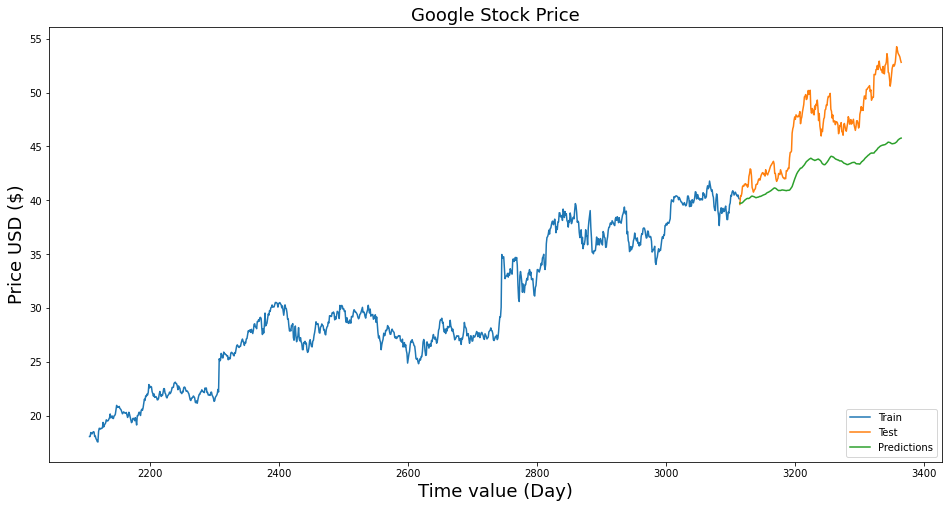

In [202]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=all_predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price', fontsize=18)
plt.xlabel('Time value (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
#plt.plot(sbin['Date'][int(idxs):int(idxn)],data['Close'])
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

In [62]:
model.eval()
inputs = torch.tensor(x_test, dtype=torch.float32)
y_pred = model(inputs)
test_loss = criterion(y_pred, y_test) 
print('test loss is {}'.format(test_loss))

RuntimeError: Expected 2 to 3 dimensions, but got 4-dimensional tensor for argument #1 'self' (while checking arguments for adaptive_avg_pool1d)

In [40]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = False)(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=60, num_heads=5, ff_dim=5, dropout=0.15)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


model.fit(x_train, y_train,  epochs=12, batch_size=1, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 60, 60)               14880     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 60)                   29040     ['lstm[0][0]']                
                                                                                                  
 reshape (Reshape)           (None, 60, 1)                0         ['lstm_1[0][0]']              
                                                                                              

In [43]:
print(x_test.shape)

predictions = model(x_test)

(251, 60, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [38]:
model.summary()
#model.get_layer(name=None, index=None)

AttributeError: 'LSTMAttentionDenseModel' object has no attribute 'summary'

In [39]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

AttributeError: 'LSTMAttentionDenseModel' object has no attribute 'built'

In [142]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=5)



Epoch 1/5
948/948 [==============================] - 17s 18ms/step - loss: 5.3601e-04
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 4.7597e-04
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 5.0369e-04
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 4.7828e-04
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 4.9565e-04


In [146]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
948/948 [==============================] - 17s 18ms/step - loss: 5.0026e-04
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 4.5737e-04
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 5.0208e-04
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 4.3513e-04
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 4.5511e-04


In [132]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.5257e-04
Epoch 2/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.2674e-04
Epoch 3/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.2960e-04
Epoch 4/10
1523/1523 [==============================] - 18s 12ms/step - loss: 1.3094e-04
Epoch 5/10
1523/1523 [==============================] - 19s 12ms/step - loss: 1.3471e-04
Epoch 6/10
1523/1523 [==============================] - 21s 14ms/step - loss: 1.1403e-04
Epoch 7/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1549e-04
Epoch 8/10
1523/1523 [==============================] - 22s 14ms/step - loss: 1.3135e-04
Epoch 9/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1106e-04
Epoch 10/10
1523/1523 [==============================] - 20s 13ms/step - loss: 1.1097e-04


In [149]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1523/1523 [==============================] - 21s 14ms/step - loss: 1.2251e-04
Epoch 2/3
1523/1523 [==============================] - 20s 13ms/step - loss: 1.2346e-04
Epoch 3/3
1523/1523 [==============================] - 20s 13ms/step - loss: 9.5623e-05


In [41]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



8/8 [==============================] - 1s 16ms/step
(251, 1)


In [42]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test , predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 1.8018439582954344
Mean Squared Error (MSE): 3.2466416500457576
Root-Mean Squared Error (RMSE): 1.801843958295434
Mean Absolute Error (MAE): 1.6090829595436613
R2 Score: 0.771813395442601
Explained Variance Score: 0.9530372648534837
Mean Absolute Percentage Error (MAPE): 3.325913020664305
Mean Percentage Error (MPE): 3.3177254519182102


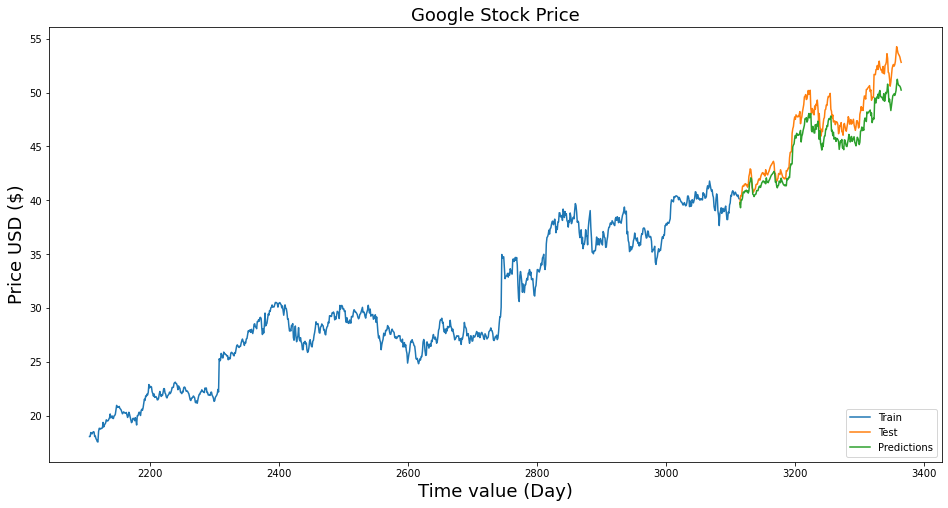

In [43]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price', fontsize=18)
plt.xlabel('Time value (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
#plt.plot(sbin['Date'][int(idxs):int(idxn)],data['Close'])
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

In [83]:
print(idxs+len(train.Close))

[3114]


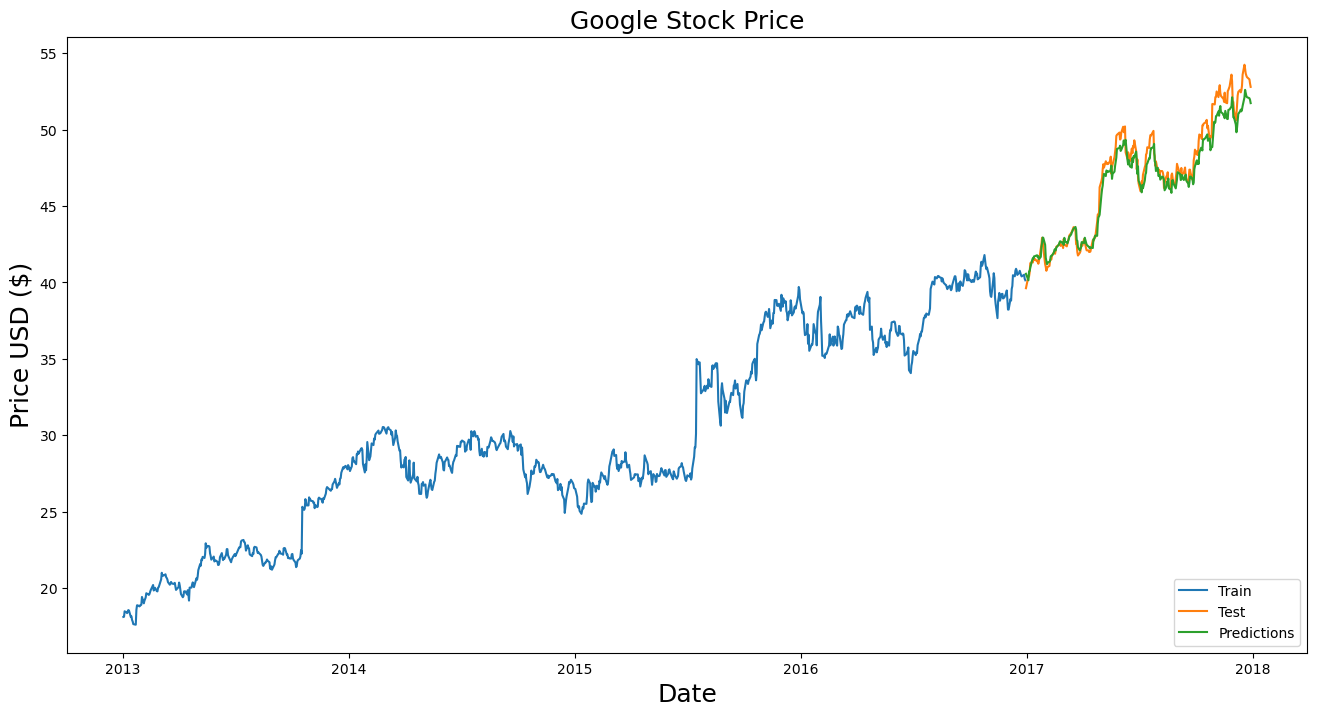

In [89]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
#plt.plot(df2['Date'][int(idxs):int(idxn)],data['Close'])
plt.plot(df2['Date'][int(idxs):int(idxs)+len(train.Close)],train['Close'])
plt.plot(df2['Date'][int(idxs)+len(train.Close):int(idxn)],valid[['Close','Predictions']])
#plt.plot(df2['Date'][int(idxs)+training_data_len:],valid['Close'])
#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

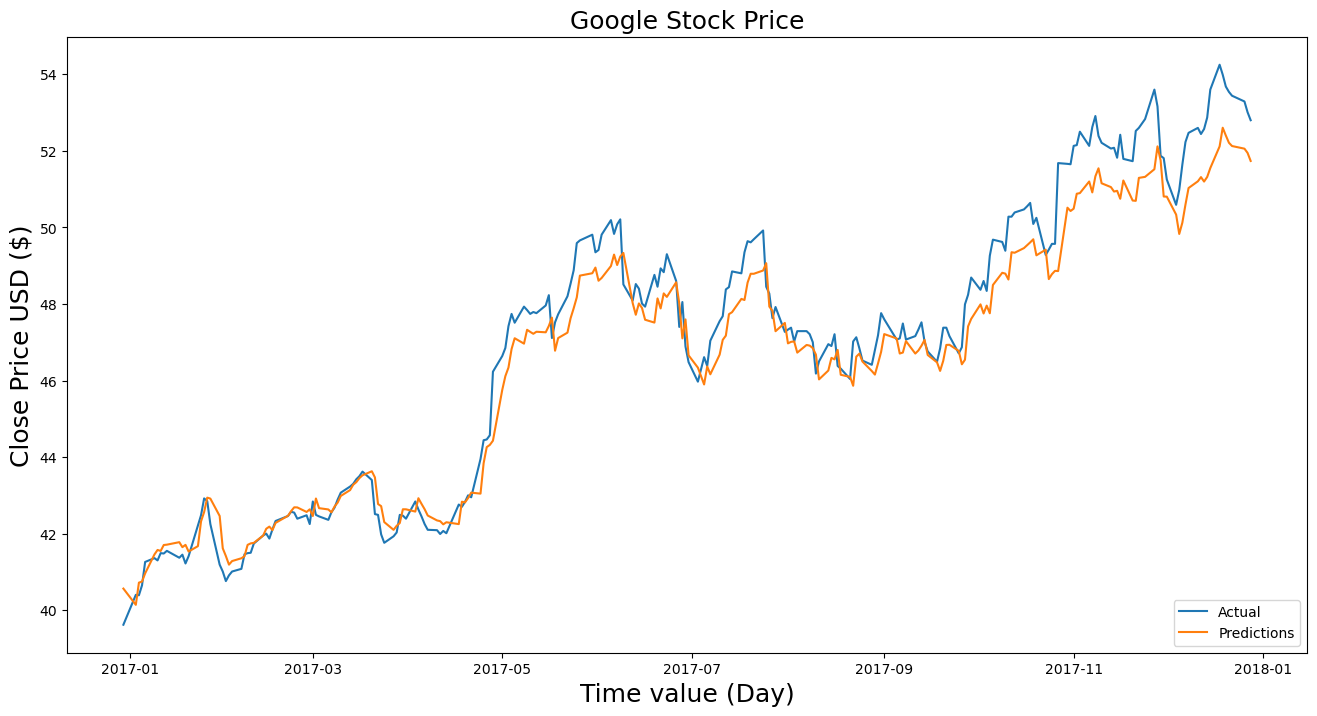

In [92]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price', fontsize=18)
plt.xlabel('Time value (Day)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(df2['Date'][int(idxs)+len(train.Close):int(idxn)],valid[['Close', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc = 'lower right')

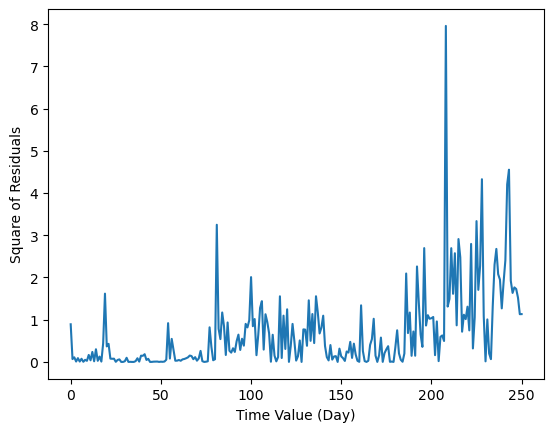

0.8148063218328796


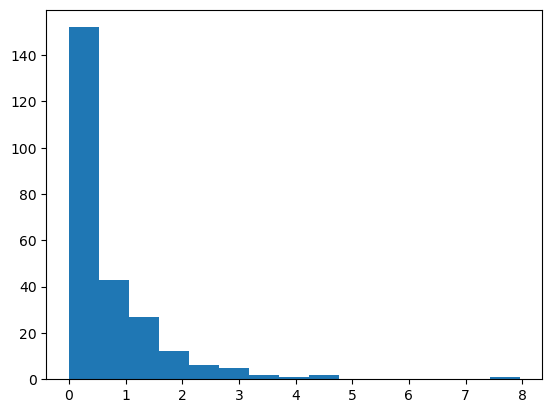

In [96]:
error=((y_test-predictions)**2)
plt.plot(error)
plt.xlabel('Time Value (Day)')
plt.ylabel('Square of Residuals')
plt.show()
plt.hist(error, bins=15)

print(np.sqrt(np.sum(error)/len(error)))

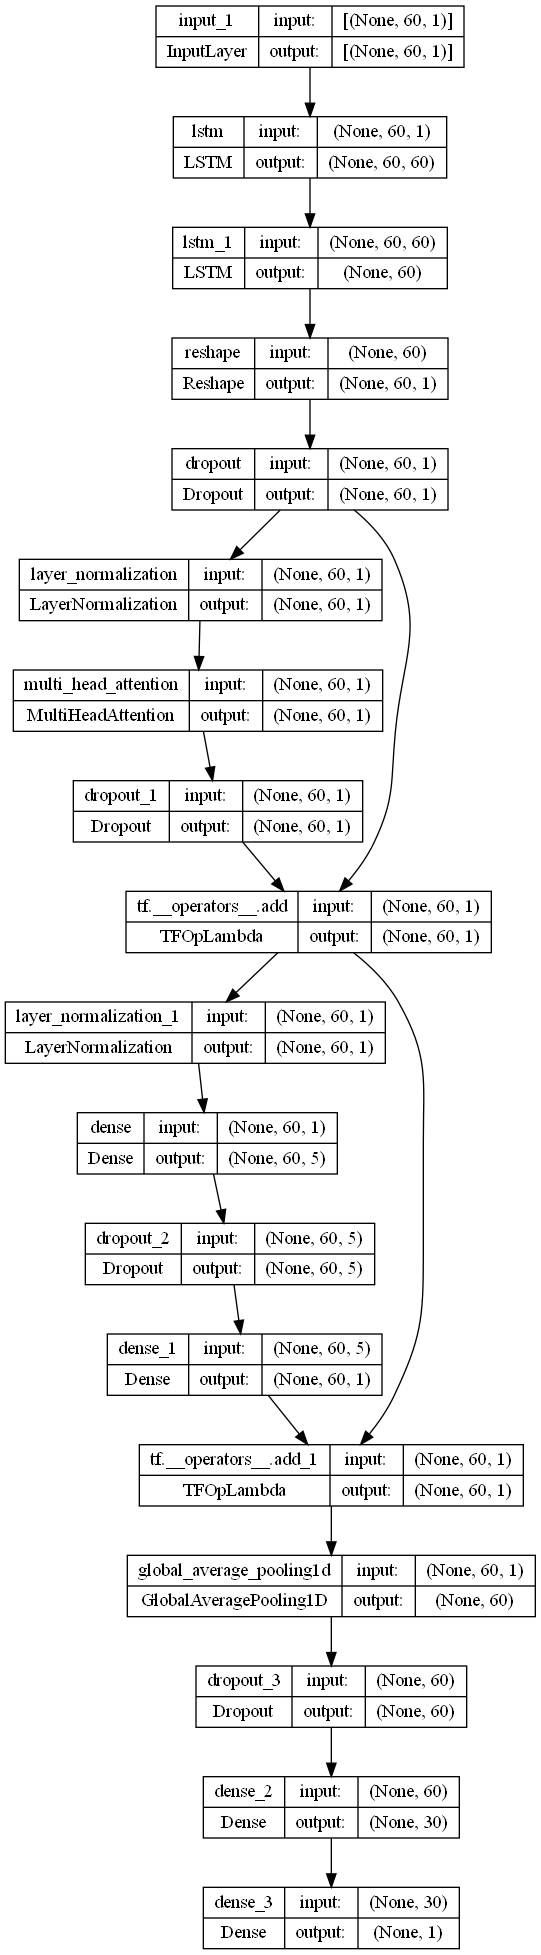

In [23]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

# Model and session save

In [27]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("Google_LSTMTransformer_model_rmse_0.815.keras")

filename = 'Google_LSTMTransformer_modelrmse_0.815.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

INFO:tensorflow:Assets written to: ram://0b36f294-1969-4b6e-8610-3a1b56946567/assets


INFO:tensorflow:Assets written to: ram://0b36f294-1969-4b6e-8610-3a1b56946567/assets


TypeError: cannot pickle 'tensorflow.python.framework._pywrap_python_api_dispatcher.PythonAPIDispatcher' object

In [29]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "Google_LSTMTransformerHybrid_rmse_0.815.pkl"  
data_pkl_file = "Google_data.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

with open(data_pkl_file, 'wb') as file:  
    pickle.dump(data, file)

INFO:tensorflow:Assets written to: ram://bbc71476-d15c-45bc-9c5a-f25020bc957d/assets


INFO:tensorflow:Assets written to: ram://bbc71476-d15c-45bc-9c5a-f25020bc957d/assets


# Saved Model Load from Disk

In [30]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("Google_LSTMTransformer_model_rmse_0.815.keras")




# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


8/8 [==============================] - 0s 38ms/step


In [143]:
import pickle

model_pkl_file = "Google_LSTMTransformerHybrid_rmse_0.54.pkl" 

data_pkl_file = "Google_data.pkl"


with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)

with open(data_pkl_file, 'rb') as file:  
    data = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://0f8c5a59-f1cd-4c94-aeb5-795f07869e0a/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [31]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 60, 60)       14880       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 60)           29040       ['lstm[0][0]']                   
                                                                                                  
 reshape (Reshape)              (None, 60, 1)        0           ['lstm_1[0][0]']                 
                                                                                              

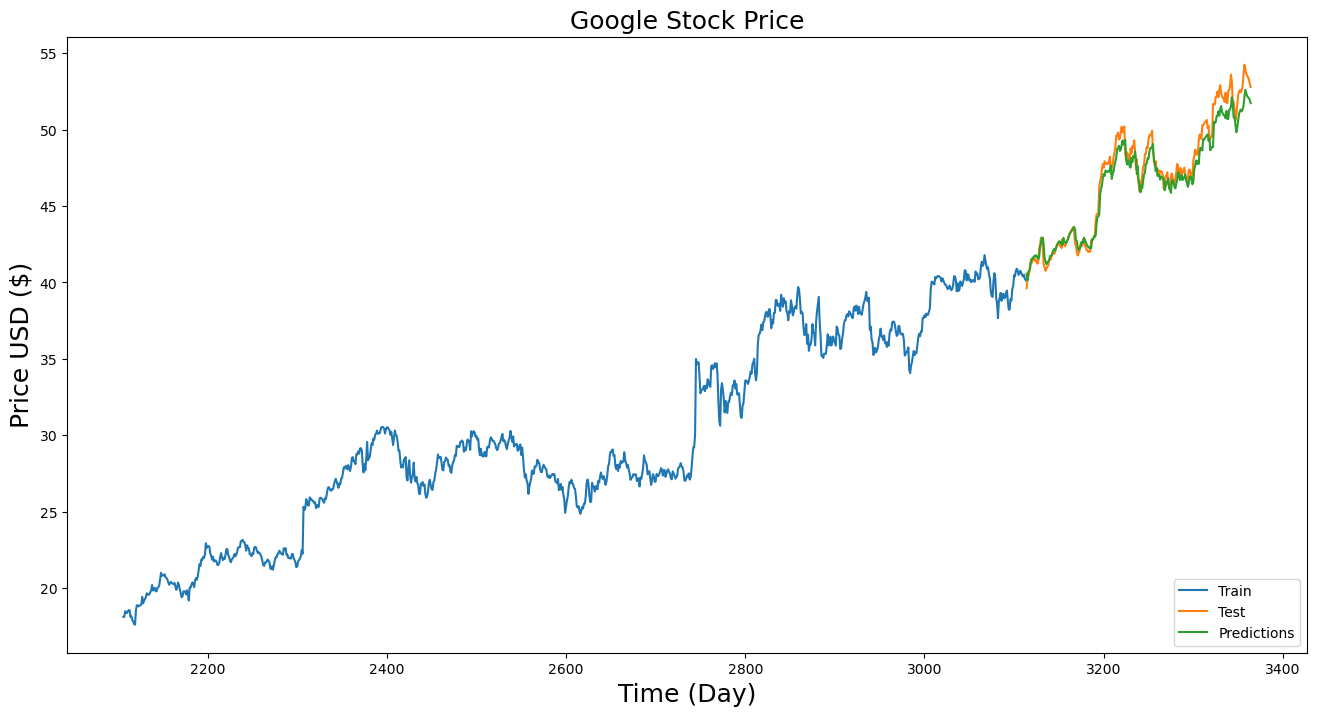

In [33]:
#plot the data
plt.style.use('default')

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price', fontsize=18)
plt.xlabel('Time (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

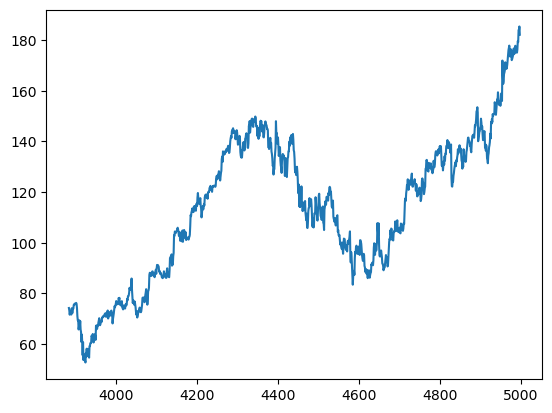

In [34]:
idxs=df2.index[df2['Date']=='2011-01-06'].values
#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2020-01-23'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset equal to the paper

#print(data)
#dataset=data.values
#print('dataset = ', dataset)
plt.plot(data_new)

(1634, 1)
[[0.02526068]
 [0.03253047]
 [0.03928624]
 ...
 [0.98876487]
 [1.        ]
 [0.9760611 ]]
(1574, 60)


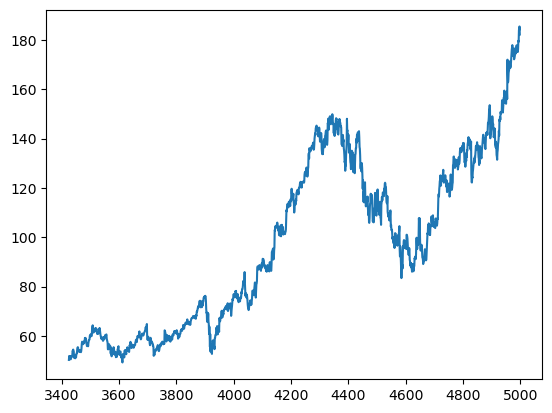

In [35]:
##############################  TEST #######################



idxn=df2.index[df2['Date']=='2017-12-29'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data_new=dataT[int(idxn):]  # Dataset after the date 23/01/2020


### or

#data_new=dataT[3674:]

#data_new=dataT[2584:]


print(data_new.shape)




scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    
plt.plot(y_test)
#print(x_test)
#print(y_test)


In [36]:
# if loaded from saved model 
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



50/50 [==============================] - 2s 38ms/step
(1574, 1)


In [37]:
predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



50/50 [==============================] - 2s 38ms/step
(1574, 1)


In [49]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values - predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values - predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 8.60124556006602
Root-Mean Squared Error (RMSE): 2.9327880182628303
Mean Absolute Error (MAE): 2.255733782951229
R2 Score: 0.9928381426339404
Explained Variance Score: 0.9934945649020782
Mean Absolute Percentage Error (MAPE): 2.7801942161143383
Mean Percentage Error (MPE): -1.3682464725442807


In [52]:
print(predictions.shape)
print(y_test.shape)
print(df2.Date[int(idxn):].shape)

(1574, 1)
(1574, 1)
(1634,)


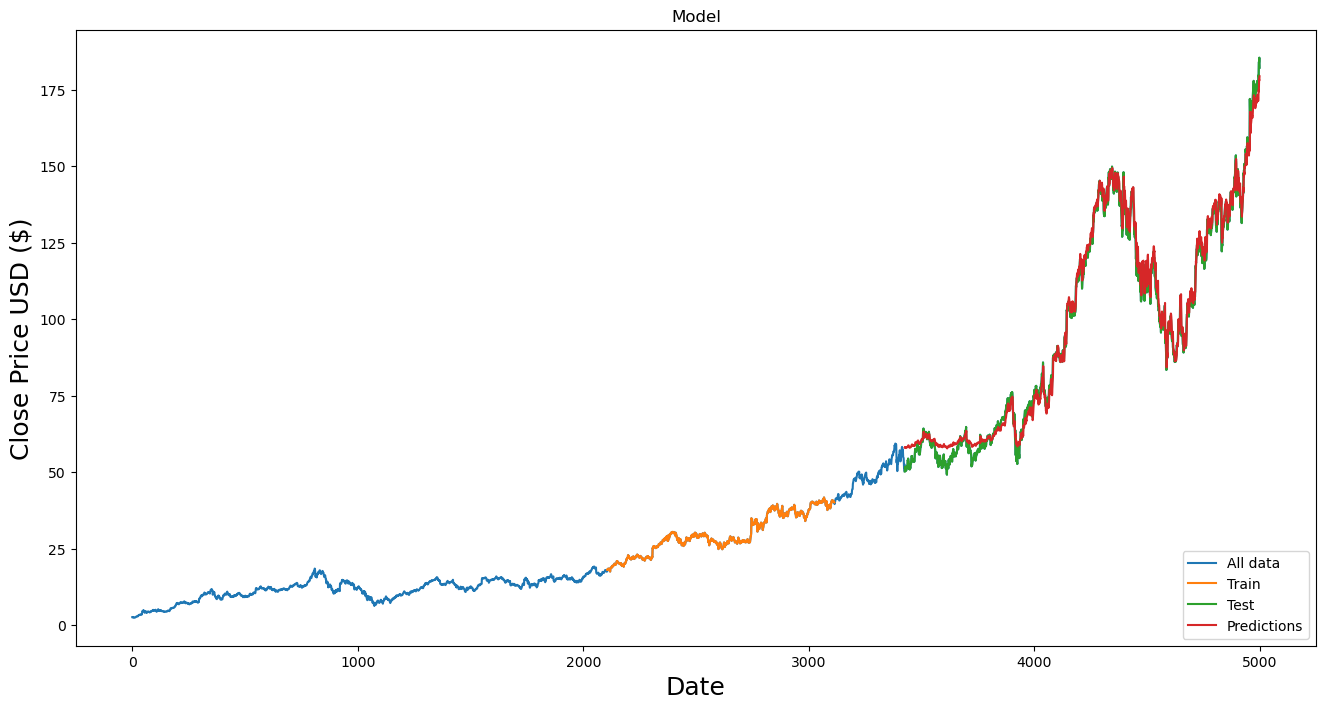

In [55]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(dataT)
plt.plot(train)
#plt.plot(y_test.values)
plt.plot(y_test)
plt.plot(y_test.index, predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['All data','Train', 'Test', 'Predictions'], loc = 'lower right')

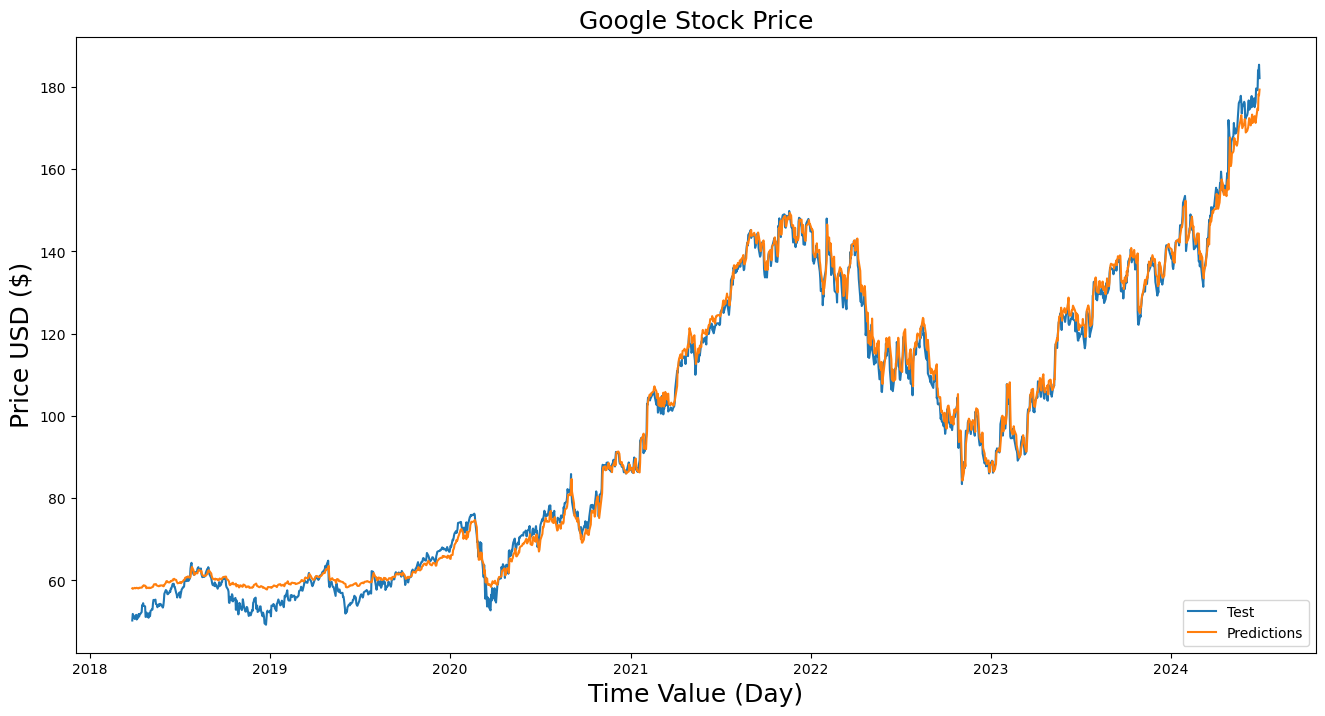

In [54]:
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price',fontsize=18)
plt.xlabel('Time Value (Day)', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
#plt.plot(dataT)
#plt.plot(train)
#plt.plot(y_test.values)

plt.plot(df2.Date[int(idxn)+60:],y_test)
plt.plot(df2.Date[int(idxn)+60:], predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc = 'lower right')

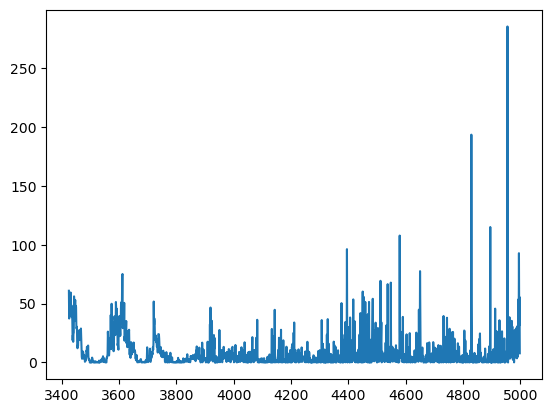

In [41]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

In [42]:
import yfinance as yf

In [43]:
bitcoin = yf.download("BTC-USD", start="2011-01-06", end="2024-4-21")

[*********************100%%**********************]  1 of 1 completed


[1522]
[4955]
[3433]


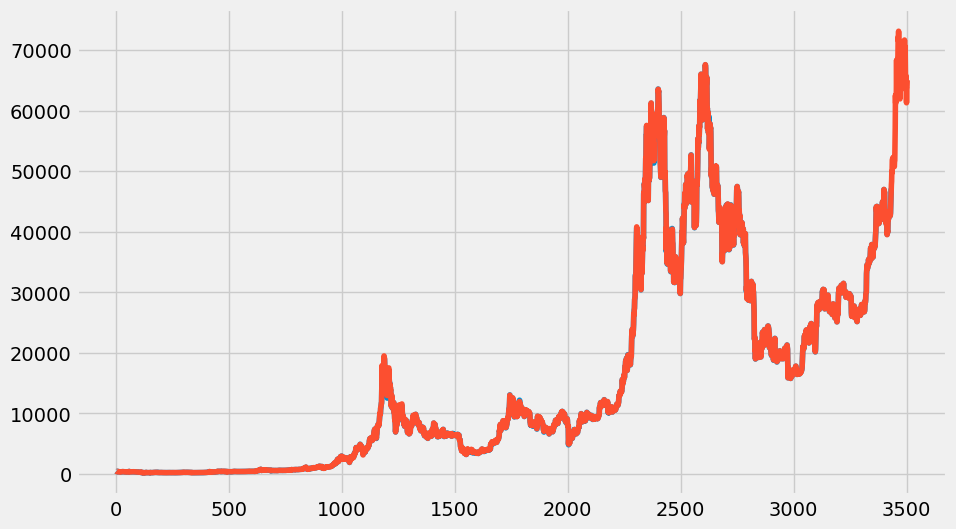

In [110]:
bitcoin_close = bitcoin['Close'].reset_index()


idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

idxn=df2.index[df2['Date']=='2024-02-10'].values
print(idxn)



idxp=bitcoin_close.index[bitcoin_close['Date']=='2024-02-10'].values
print(idxp)


plt.plot(bitcoin_close['Close'][0:int(idxp)].index, df2['Close'][int(idxs):int(idxn)])
plt.plot(bitcoin_close['Close'].index, bitcoin_close['Close'].values)

In [93]:
print(bitcoin_close)
print(df2)

           Date         Close
0    2014-09-17    457.334015
1    2014-09-18    424.440002
2    2014-09-19    394.795990
3    2014-09-20    408.903992
4    2014-09-21    398.821014
...         ...           ...
3499 2024-04-16  63811.863281
3500 2024-04-17  61276.691406
3501 2024-04-18  63512.753906
3502 2024-04-19  63843.570312
3503 2024-04-20  64994.441406

[3504 rows x 2 columns]
           Date    Close     Open     High      Low Trading_volume Price
0    2010-07-18      0.1      0.0      0.1      0.1          0.08K   0.0
1    2010-07-19      0.1      0.1      0.1      0.1          0.57K   0.0
2    2010-07-20      0.1      0.1      0.1      0.1          0.26K   0.0
3    2010-07-21      0.1      0.1      0.1      0.1          0.58K   0.0
4    2010-07-22      0.1      0.1      0.1      0.1          2.16K   0.0
...         ...      ...      ...      ...      ...            ...   ...
4951 2024-02-06  43087.7  42697.6  43375.5  42566.8         33.32K  0.01
4952 2024-02-07  44339.8  43088

In [96]:
idxs=df2.index[df2['Date']=='2014-09-17'].values
print(idxs)

[1522]


# Prophet Model

In [150]:
# 5 yl sonraki Apple hisse senedi fiyatları.
from prophet import Prophet

In [155]:
print(df2.head())

        Date Close  Open  High   Low     Vol. Change %
0 2004-08-20  2.71  2.54  2.73  2.51  228.59M    7.97%
1 2004-08-23  2.74  2.77  2.84  2.73  182.80M    1.11%
2 2004-08-24  2.62  2.78  2.79  2.59  152.64M   -4.38%
3 2004-08-25  2.65  2.63   2.7   2.6   91.98M    1.15%
4 2004-08-26   2.7  2.63   2.7  2.62   71.02M    1.89%


In [156]:
appl = df2[['Date', 'Close']]

In [157]:
appl.columns = ['ds', 'y'] # Date ve close sütun isimlerini değiştirip ds ve y yaptık.
appl.head(3)

,ds,y
0,2004-08-20,2.71
1,2004-08-23,2.74
2,2004-08-24,2.62


In [158]:
model = Prophet() # Burada çağırıyoruz.
# Prophet zamana bağlı tahmin yapmada bize yardımcı oluyor.

In [159]:
model.fit(appl) # Fit ettik yani modele öğrettirdik

01:46:29 - cmdstanpy - INFO - Chain [1] start processing
01:46:30 - cmdstanpy - INFO - Chain [1] done processing


In [160]:
future = model.make_future_dataframe(periods=1800, freq="D") # Geleceğe kadar olan süreleri dataframe'le bulup tahmin eder.
# periods=1800 -> Elimizdeki veriye göre 1800 günlük bir tahmin yapacak.
# freq="D" -> frequency. D-> daily yapıyor. Y olsa year'a göre olacaktı.

In [161]:
tahmin = model.predict(future)

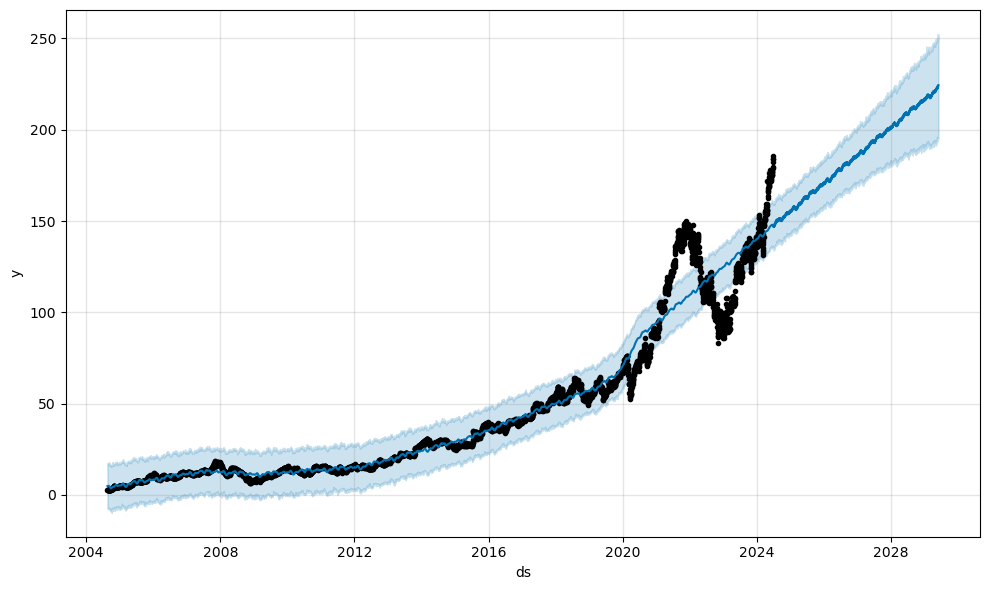

In [162]:
model.plot(tahmin);

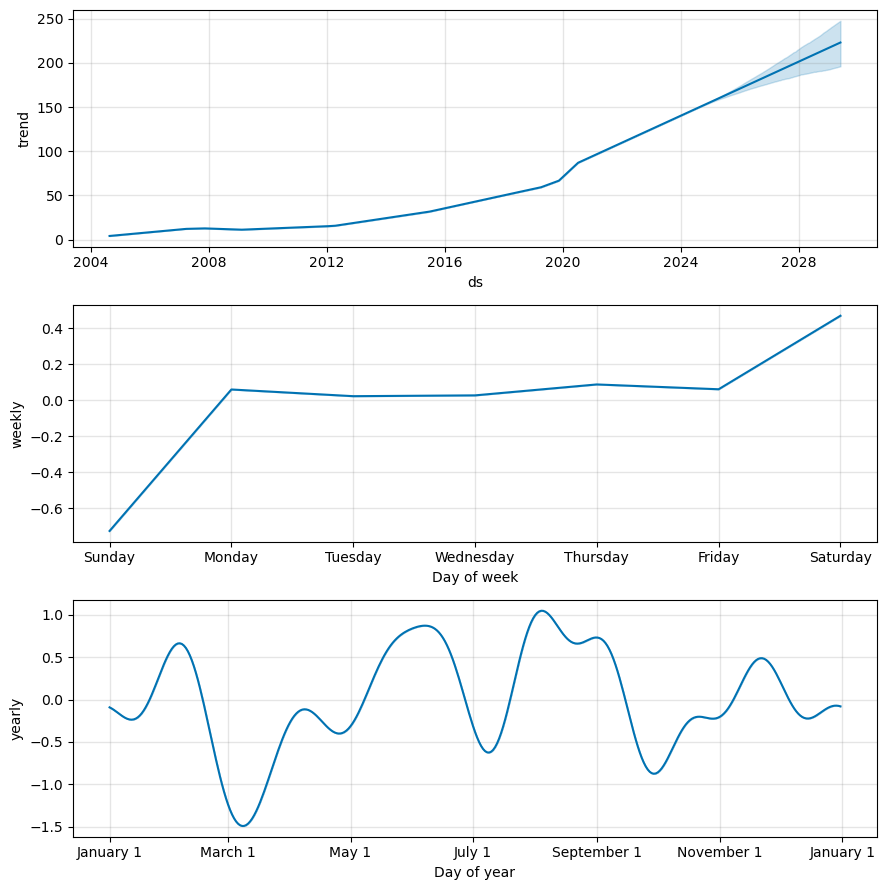

In [163]:
model.plot_components(tahmin);

In [172]:
print(model.trends)

AttributeError: 'Prophet' object has no attribute 'trends'